# An example using Feature weighted ECM clustering


In [20]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Lonoshpere cancer DS: 351 instances, 34 features


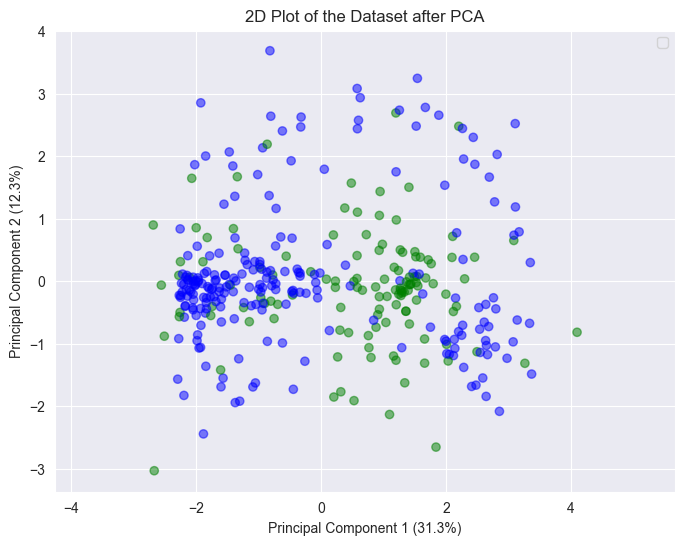

In [21]:
# fetch dataset
iris = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = iris.data.features
X = X.fillna(0)
X = X.astype(float)
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['Class'])
df = pd.concat([X, y], axis=1)

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Lonoshpere cancer DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
value_to_color = {0: 'green', 1: 'blue', 2: 'red'}
colors = [value_to_color[val] for val in numeric_labels]

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [22]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 1237.7280929155909]
[2, 1232.979379836437]
[3, 1232.6644393737981]
[4, 1232.625508613451]
[5, 1232.6204028263685]
[6, 1232.6197569287806]
[   0.         1232.61975693 1232.61975693]
[1, 1237.7280929155909]
[2, 1232.979379836437]
[3, 1232.6644393737981]
[4, 1232.625508613451]
[5, 1232.6204028263685]
[6, 1232.6197569287806]
[1.00000000e+00 1.23261976e+03 1.23261976e+03]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   2.         1232.61975637 1232.61975637]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   3.         1232.61975637 1232.61975637]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   4.         1232.61975637 1232.61975637]


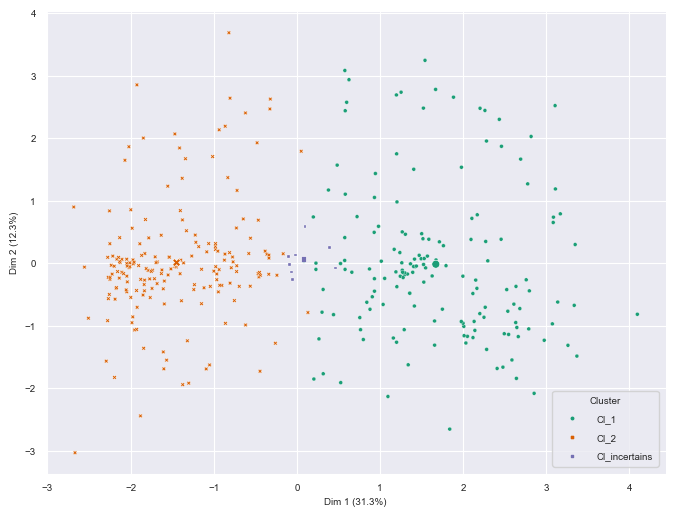

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.17760685473768603
Maximum Non-specificity value: 1.8773786466942686
Minimum Non-specificity value: 0.2000702217164208
Average Non-specificity value: 1.0359640023223422


In [23]:
# Traditional ECM clustering
model = ecm(x=X, c=2, beta=2, alpha=1, delta=100, ntrials=5)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

[1, 1.0434445555066407]
[2, 0.8574378310254899]
[3, 0.8369586363897938]
[4, 0.8336486107868416]
[5, 0.8325948720415033]
[6, 0.8315879499658153]
[7, 0.8305927830886932]
[0.         0.83059278 0.83059278]
[1, 1.0248244403322704]
[2, 0.8284082382062027]
[3, 0.8092519162356723]
[4, 0.8068056074491146]
[5, 0.8057794013567148]
[6, 0.8047879232980968]
[1.         0.80478792 0.80478792]
[1, 0.9819989009519449]
[2, 0.8479163438833976]
[3, 0.8354676233149948]
[4, 0.8344120964150141]
[5, 0.833416650206159]
[2.         0.83341665 0.80478792]
[1, 1.0042000981722514]
[2, 0.8513798437963277]
[3, 0.8351777565952494]
[4, 0.8337979427961896]
[5, 0.8327588080438139]
[6, 0.8317605347631672]
[3.         0.83176053 0.80478792]
[1, 1.0334196419988668]
[2, 0.8624707535097458]
[3, 0.8455037167458177]
[4, 0.8422189511080571]
[5, 0.8411893375632262]
[6, 0.8401904226562862]
[4.         0.84019042 0.80478792]


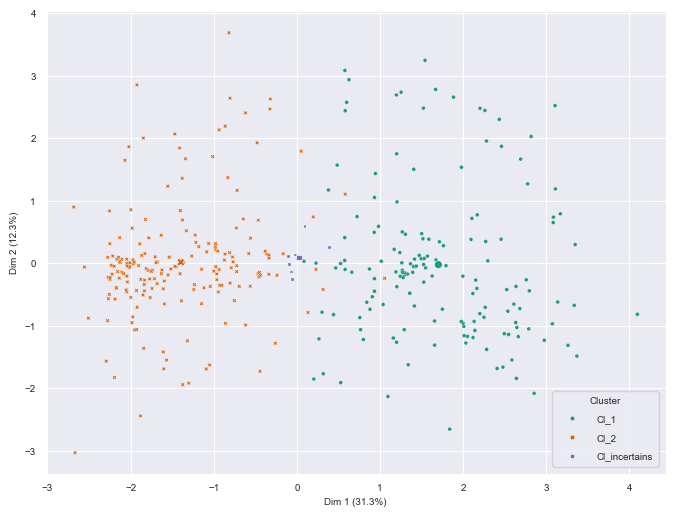

Weight matrix: 
 [[0.05209777 0.13194805 0.02460496 0.03194402 0.02326104 0.02952003
  0.02796936 0.02266087 0.02851223 0.02576195 0.02347766 0.02434155
  0.02158419 0.02668386 0.02074885 0.03149221 0.02174255 0.02760039
  0.02360447 0.02320416 0.02372502 0.02263399 0.02289953 0.0239198
  0.02223541 0.03408378 0.02071773 0.02368499 0.02223935 0.03161261
  0.02467825 0.02635619 0.02795963 0.03049358]
 [0.06117469 0.14271128 0.03037544 0.03307154 0.02808444 0.03053169
  0.03113233 0.02562049 0.02973033 0.03067155 0.02494977 0.02810152
  0.02050521 0.02759868 0.0181585  0.03049583 0.02107146 0.02509546
  0.01970945 0.02365329 0.02001143 0.0240924  0.01989318 0.02114362
  0.0229346  0.0219743  0.03325293 0.02060069 0.02130928 0.02191691
  0.02021299 0.02118533 0.02391141 0.02511799]]
Covariance Matrix 1: [0.15632754 0.         0.37484339 0.25648037 0.36588421 0.28098559
 0.25748303 0.33756495 0.24530558 0.29725338 0.32069613 0.33027671
 0.32995656 0.32431228 0.28174758 0.24701926 0.3284600

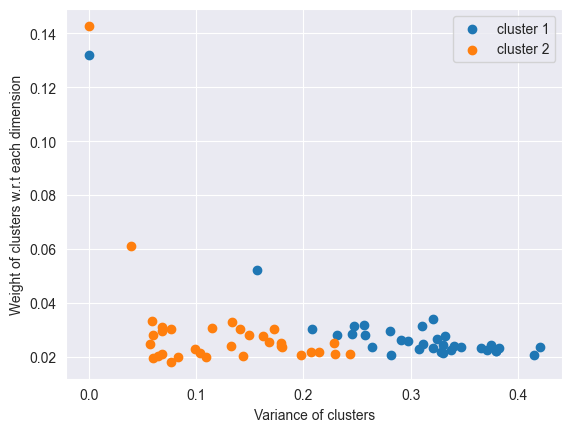

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.1537960247637667 - J value: 0.8047879232980968
Maximum Non-specificity value: 1.7665049786669509
Minimum Non-specificity value: 0.23821794936810292
Average Non-specificity value: 1.0411631318202654


In [24]:
# Feature weighted ECM clustering
c = 2
model = fwecm(x=X, c=c, beta=2, alpha=1, delta=100, ntrials=5, epsi=1e-3)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Non-specificity equation
![test.png](assets/Non-specificity.png)